**Fase 1: Business/Data Understanding**

In de eerste stap worden de CSV-bestanden geladen. Voor het CSV-bestand 'flight_dataset' is low_memory=False ingestelt bij het lezen van de CSV-bestanden met Pandas. Dit is gedaan om de automatische type inferentie uit te schakelen en Pandas te dwingen om meer geheugen te gebruiken om de hele kolom in één keer in het geheugen te laden.

In [1]:
import pandas as pd
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights_dataset.csv', low_memory=False)

De dataset van flights bevat in totaal bijna 6 miljoen aan rijen.

In [2]:
flights.shape

(5729195, 27)

Om een bruikbaar dataset te gebruiken, hebben wij ervoor gekozen om een sample te nemen van de eerste 100.000 rijen (zie document voor verdere toelichting.)

In [3]:
flights_nodig = flights[0:100000]
flights_nodig

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,1448,404.0,4.0,430,408.0,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,2330,737.0,4.0,750,741.0,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,2296,800.0,11.0,806,811.0,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,2342,748.0,8.0,805,756.0,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,1448,254.0,5.0,320,259.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015,1,7,3,AA,162,N5DEAA,HNL,LAX,1338,...,2556,2033.0,11.0,2103,2044.0,NaN,NaN,NaN,NaN,NaN
99996,2015,1,7,3,B6,844,N351JB,CHS,DCA,1338,...,444,1522.0,2.0,1456,1524.0,0.0,0.0,0.0,28.0,0.0
99997,2015,1,7,3,EV,4096,N14991,ORD,CHS,1338,...,760,1637.0,8.0,1650,1645.0,NaN,NaN,NaN,NaN,NaN
99998,2015,1,7,3,OO,6287,N905SW,SFO,SBA,1338,...,262,1449.0,7.0,1449,1456.0,NaN,NaN,NaN,NaN,NaN


Seaborn is gebrukt om onderstaande plot te creëren. In deze plot worden de uitschieters aangetoond. Dit betekent dat er veel gevallen zijn waarin de werkelijke vertrektijd ("DEPARTURE_TIME") later is dan de geplande vertrektijd ("SCHEDULED_DEPARTURE"). In een context van vluchtgegevens kan dit duiden op vertragingen in het vertrek van de vluchten.

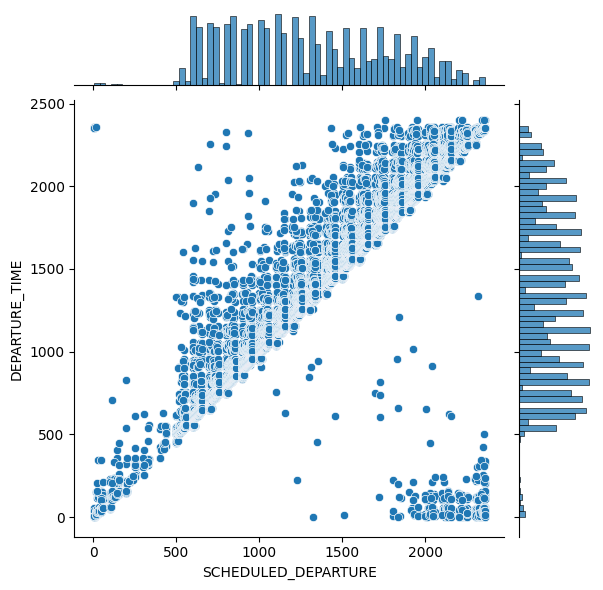

In [5]:
import seaborn as sb
sb.jointplot(data=flights_nodig, x="SCHEDULED_DEPARTURE", y="DEPARTURE_TIME")

Het analyseren van correlatie tussen features is een belangrijk onderdeel van deze fase om mogelijke relaties tussen deze featuren te identificeren. Daarnaast helpt dit ook voor feature selection om overfitting te voorkomen.

In [10]:
corr = flights_nodig.corr(method='pearson')

C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_3984\3369061735.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = flights_nodig.corr(method='pearson')


<Axes: >

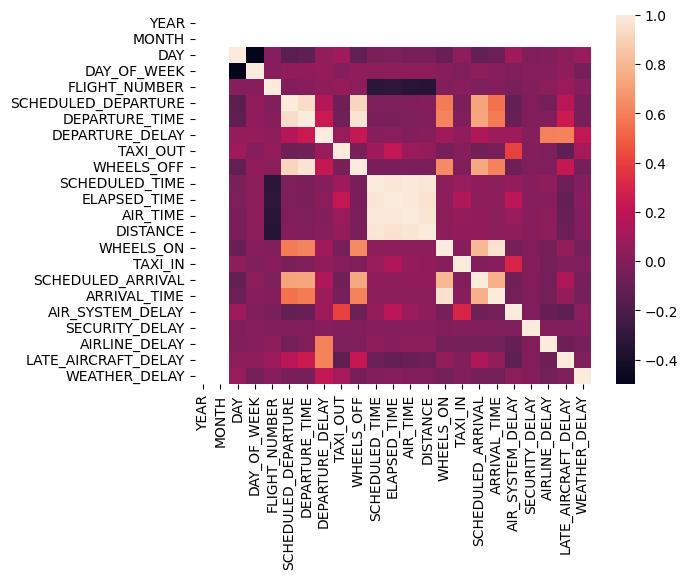

In [11]:
sb.heatmap(corr)

In [12]:
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,-0.500245,0.006469,-0.143896,-0.126434,0.053874,0.086968,-0.121594,...,-0.037377,-0.091182,0.033128,-0.111504,-0.086568,0.093943,-0.008875,-0.005287,0.032071,0.062693
DAY_OF_WEEK,NaN,NaN,-0.500245,1.000000,0.009302,0.048609,0.047382,0.056633,0.007689,0.045963,...,0.024587,0.013405,-0.016776,0.031457,0.010924,-0.019581,0.007637,0.004842,0.033108,-0.051237
FLIGHT_NUMBER,NaN,NaN,0.006469,0.009302,1.000000,-0.004977,0.009838,0.035249,0.062342,0.016288,...,-0.352973,-0.005080,0.014519,-0.021843,-0.000673,-0.032631,-0.006599,0.022514,0.078688,0.005523
SCHEDULED_DEPARTURE,NaN,NaN,-0.143896,0.048609,-0.004977,1.000000,0.943207,0.172293,-0.080323,0.912165,...,0.000219,0.584909,-0.027095,0.727507,0.551765,-0.111136,-0.017856,-0.053057,0.183808,-0.042451
DEPARTURE_TIME,NaN,NaN,-0.126434,0.047382,0.009838,0.943207,1.000000,0.243952,-0.068738,0.966609,...,-0.016165,0.618220,-0.017278,0.734162,0.583990,-0.091497,-0.012794,-0.011866,0.246071,-0.045665
DEPARTURE_DELAY,NaN,NaN,0.053874,0.056633,0.035249,0.172293,0.243952,1.000000,0.063319,0.231796,...,0.005636,0.092073,0.040692,0.153365,0.081109,0.086522,0.007502,0.604608,0.608404,0.210501
TAXI_OUT,NaN,NaN,0.086968,0.007689,0.062342,-0.080323,-0.068738,0.063319,1.000000,-0.041379,...,0.057864,-0.043465,0.008490,-0.061260,-0.044019,0.406633,-0.007766,-0.025335,-0.128864,0.118934
WHEELS_OFF,NaN,NaN,-0.121594,0.045963,0.016288,0.912165,0.966609,0.231796,-0.041379,1.000000,...,-0.026760,0.641722,-0.014686,0.743692,0.607983,-0.083709,-0.013881,-0.016021,0.222005,-0.054263


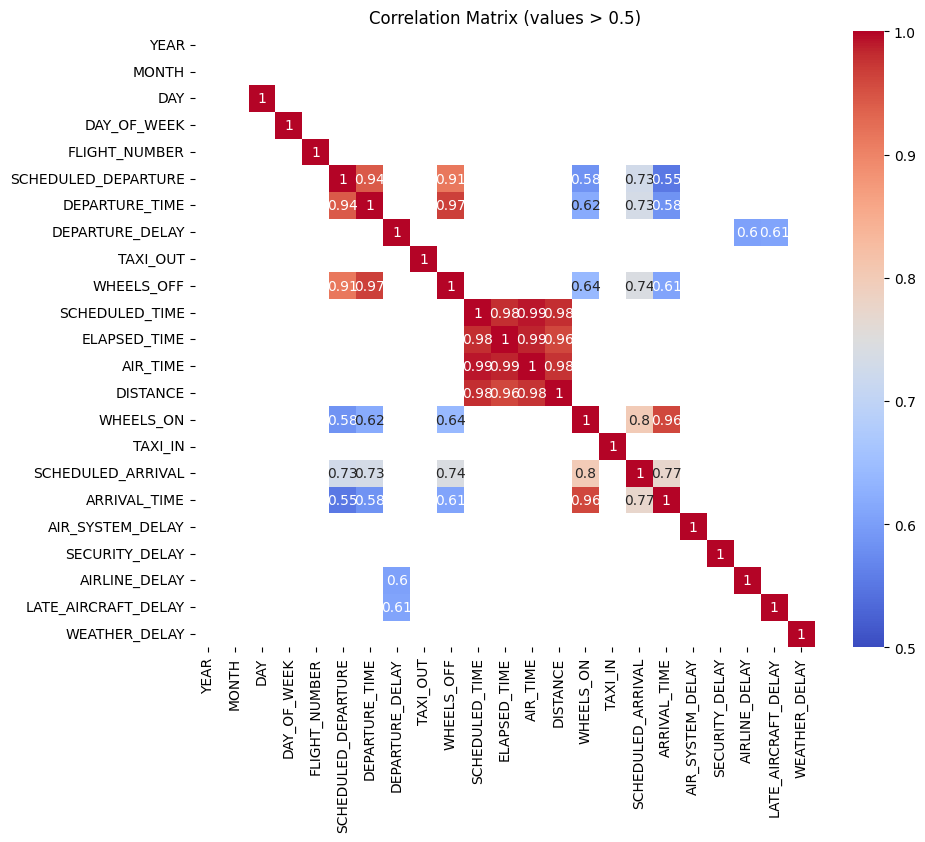

In [13]:
import matplotlib.pyplot as plt

#De waarden filteren die groter zijn dan 0.5
high_corr = corr[corr > 0.5]

plt.figure(figsize=(10, 8))
sb.heatmap(high_corr, annot=True, cmap='coolwarm', vmin=0.5)
plt.title('Correlation Matrix (values > 0.5)')
plt.show()


In [14]:
flights_nodig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          100000 non-null  object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       100000 non-null  float64
 11  DEPARTURE_DELAY      100000 non-null  float64
 12  TAXI_OUT             100000 non-null  float64
 13  WHEELS_OFF           100000 non-null  float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import OrderedDict
from matplotlib.gridspec import GridSpec

count_flights = flights_nodig['ORIGIN_AIRPORT'].value_counts()

plt.figure(figsize=(11,11))

colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']
size_limits = [1, 100, 1000, 10000, 100000, 1000000, 10000000]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 

map = Basemap(resolution='i', llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth=3)
map.drawstates(color='0.3')

for index, (code, y, x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    isize = [i for i, val in enumerate(size_limits) if val < count_flights.get(code, 0)]
    ind = isize[-1] if isize else 0  # Use 0 if isize is empty
    map.plot(x, y, marker='o', markersize=ind+5, markeredgewidth=1, color=colors[ind],
             markeredgecolor='k', label=labels[ind])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ['1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
             '10000 <.< 100000', '100000 <.< 1000000']
new_label = OrderedDict()

for key in key_order:
    if key in by_label:
        new_label[key] = by_label[key]
    else:
        print(f"Warning: Key '{key}' not found in legend.")

plt.legend(new_label.values(), new_label.keys(), loc=1, prop={'size': 11},
           title='Number of flights per year', frameon=True, framealpha=1)
plt.show()

**Fase 2: Data Preparation**

In [ ]:
flights_nodig['DATE'] = pd.to_datetime(flights_nodig[['YEAR','MONTH', 'DAY']])

In [ ]:
import datetime

def format_tijd(uur):
    if pd.isnull(uur):
        return np.nan
    else:
        if uur == 2400:
            uur = 0
        uur = "{0:04d}".format(int(uur))
        tijd = datetime.time(int(uur[0:2]), int(uur[2:4]))
        return tijd

def datum_tijd_combineren(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        if isinstance(x[1], datetime.time):
            return datetime.datetime.combine(x[0], x[1])
        elif isinstance(x[1], (int, np.int64, np.float64)):
            # Convert numeric value to datetime.time
            hours, minutes = divmod(int(x[1]), 100)
            time_obj = datetime.time(hours, minutes)
            return datetime.datetime.combine(x[0], time_obj)
        else:
            raise ValueError(f"Unexpected type for time: {type(x[1])}")

def create_flight_time(df, col):
    lijst = []
    for index, cols in df[['DATE', col]].iterrows():
        if pd.isnull(cols[1]):
            lijst.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0, 0)
            lijst.append(datum_tijd_combineren(cols))
        else:
            if isinstance(cols[1], str):
                cols[1] = format_tijd(cols[1])
            lijst.append(datum_tijd_combineren(cols))
    return pd.Series(lijst)

In [ ]:
import numpy as np
flights_nodig['SCHEDULED_DEPARTURE'] = create_flight_time(flights_nodig, 'SCHEDULED_DEPARTURE')
flights_nodig['DEPARTURE_TIME'] = flights_nodig['DEPARTURE_TIME'].apply(format_tijd)
flights_nodig['SCHEDULED_ARRIVAL'] = flights_nodig['SCHEDULED_ARRIVAL'].apply(format_tijd)
flights_nodig['ARRIVAL_TIME'] = flights_nodig['ARRIVAL_TIME'].apply(format_tijd)

print(flights_nodig.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME', 'ARRIVAL_TIME', 'DEPARTURE_DELAY']])

In [ ]:
flights_data = flights_nodig.drop(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'TAIL_NUMBER', 'FLIGHT_NUMBER', 'TAXI_OUT', 'WHEELS_OFF', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], axis=1)
flights_data.head()

In [ ]:
missing_variables = flights_data.isnull().sum(axis=0).reset_index()
missing_variables.columns = ['variable', 'missing values']
missing_variables['filling factor (%)']=(flights_data.shape[0]-missing_variables['missing values'])/flights_data.shape[0]*100
missing_variables.sort_values('filling factor (%)').reset_index(drop = True)

In [ ]:
flights_data.dropna(inplace=True)

In [ ]:
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [ ]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

global_stats = flights_data['DEPARTURE_DELAY'].groupby(flights_data['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

In [ ]:
font = {'family' : 'sans-serif', 'weight' : 'bold', 'size'   : 10}
mpl.rc('font', **font)
import matplotlib.patches as mpatches

flights_2 = flights_data.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
flights_2['AIRLINE'] = flights_2['AIRLINE'].replace(abbr_companies)

colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']

fig = plt.figure(1, figsize=(16,16))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 

labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 5000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(10)
ax1.axis('equal')
ax1.set_title('% of flights per airline', bbox={'facecolor':'midnightblue', 'pad':3},
              color = 'w',fontsize=18)

comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.1, 0.9), 
           fontsize = 10, bbox_transform=plt.gcf().transFigure)

sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(10)
ax2.axis('equal')
ax2.set_title('Mean delay at origin airport', bbox={'facecolor':'midnightblue', 'pad':3},
              color='w', fontsize=18)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
flights_data['DELAY_LEVEL'] = flights_data['DEPARTURE_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=flights_data)

labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

In [ ]:
identify_airport = airports.set_index('IATA_CODE')['CITY'].to_dict()
latitude_airport = airports.set_index('IATA_CODE')['LATITUDE'].to_dict()
longitude_airport = airports.set_index('IATA_CODE')['LONGITUDE'].to_dict()

In [ ]:
airport_mean_delays = pd.DataFrame(pd.Series(flights_data['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in abbr_companies.keys():
    flights_1 = flights_data[flights_data['AIRLINE'] == carrier]
    test = flights_1['DEPARTURE_DELAY'].groupby(flights_data['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

In [ ]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()
plt.show()

**Fase 3: Modelling**

In [ ]:
# Convert 'SCHEDULED_DEPARTURE' to datetime
flights_data['SCHEDULED_DEPARTURE'] = pd.to_datetime(flights_data['SCHEDULED_DEPARTURE'])

# Filter DataFrame for training set
delay_train = flights_data[flights_data['SCHEDULED_DEPARTURE'].dt.date < pd.to_datetime('2015-01-23').date()]

# Filter DataFrame for test set
delay_test = flights_data[flights_data['SCHEDULED_DEPARTURE'].dt.date > pd.to_datetime('2015-01-23').date()]
flights_data = delay_train

In [ ]:
def get_flight_delays(flights_data, carrier, id_airport, extrem_values = False):
    flights_delay_2 = flights_data[(flights_data['AIRLINE'] == carrier) & (flights_data['ORIGIN_AIRPORT'] == id_airport)]
    #_______________________________________
    # remove extreme values before fitting
    if extrem_values:
        flights_delay_2['DEPARTURE_DELAY'] = flights_delay_2['DEPARTURE_DELAY'].apply(lambda x:x if x < 60 else np.nan)
        flights_delay_2.dropna(how='any', inplace=True)
    #__________________________________
    # Conversion: date + heure -> heure
    flights_delay_2.sort_values('SCHEDULED_DEPARTURE', inplace = True)
    flights_delay_2['TIME_DEPARTURE'] =  flights_delay_2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
    #___________________________________________________________________
    # regroupement des vols par heure de départ et calcul de la moyenne
    test2 = flights_delay_2['DEPARTURE_DELAY'].groupby(flights_delay_2['TIME_DEPARTURE']).apply(get_stats).unstack()
    test2.reset_index(inplace=True)
    #___________________________________
    # conversion de l'heure en secondes
    fct = lambda x:x.hour*3600+x.minute*60+x.second
    test2.reset_index(inplace=True)
    test2['TIME_DEPARTURE_MIN'] = test2['TIME_DEPARTURE'].apply(fct)
    return test2

In [ ]:
def get_merged_delays(flights_data, carrier):
    lijst_airports = flights_data[flights_data['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    merged_df = None
    i = 0
    lijst_columns = ['AIRPORT_ID', 'TIME_DEPARTURE_MIN', 'mean']
    for id_airport in lijst_airports:
        test2 = get_flight_delays(flights_data, carrier, id_airport, True)
        test2.loc[:, 'AIRPORT_ID'] = id_airport
        test2 = test2[lijst_columns]
        test2.dropna(how = 'any', inplace = True)
        if i == 0:
            merged_df = test2.copy()
        else:
            merged_df = pd.concat([merged_df, test2], ignore_index = True)
        i += 1    
    return merged_df

In [ ]:
carrier = 'AA'
merged_df = get_merged_delays(flights_data, carrier)
merged_df.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(merged_df['AIRPORT_ID'])
#__________________________________________________________
# correspondance between the codes and tags of the airports
zipped = zip(integer_encoded, merged_df['AIRPORT_ID'])
label_airports = list(set(list(zipped)))
label_airports.sort(key = lambda x:x[0])
label_airports[:5]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
b = np.array(merged_df['TIME_DEPARTURE_MIN'])
b = b.reshape(len(b),1)
X = np.hstack((onehot_encoded, b))
Y = np.array(merged_df['mean'])
Y = Y.reshape(len(Y), 1)
print(X.shape, Y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
predictions = lm.predict(X)
print("MSE =", metrics.mean_squared_error(predictions, Y))

In [ ]:
icount = 0
for i, val in enumerate(Y):
    if abs(val-predictions[i]) > 15: icount += 1
'{:.2f}%'.format(icount / len(predictions) * 100)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in predictions])
tips["original_data"] = pd.Series([float(s) for s in Y])

sns.jointplot(x="original_data", y="prediction", data=tips, height=6, ratio=7,
              kind='reg', joint_kws={'line_kws': {'color': 'limegreen'}})

plt.xlabel('Mean delays (min)', fontsize=15)
plt.ylabel('Predictions (min)', fontsize=15)
plt.plot(list(range(-10, 25)), list(range(-10, 25)), linestyle=':', color='r')

# Show the plot
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X_train.shape

In [ ]:
carrier = 'AA'
merged_df_test = get_merged_delays(delay_test, carrier)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Create a linear regression model
linear_reg_model = LinearRegression()

# Fit the model on the training data
linear_reg_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions = linear_reg_model.predict(X_test)

# Calculate the mean squared error
mse = metrics.mean_squared_error(predictions, Y_test)

# Print the mean squared error
print('MSE = {:.2f}'.format(mse))

In [ ]:
'Gemiddelde vertraging = {:.2f} min'.format(np.sqrt(mse))

In [ ]:
icount = 0
for i, val in enumerate(Y_test):
    if abs(val-predictions[i]) > 15: icount += 1
print("Vertraging > 15 minutes = {}%".format(round((icount / len(predictions))*100,2)))

In [ ]:
Y_test = Y_test.ravel()

In [ ]:
print(Y_test.shape)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model
tree_reg_model = DecisionTreeRegressor()

# Fit the model on the training data
tree_reg_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_tree = tree_reg_model.predict(X_test)
comparison_df_tree = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions_tree})
print(comparison_df_tree)


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse_tree = mean_squared_error(Y_test, predictions_tree)
print('Mean Squared Error (MSE): {:.2f}'.format(mse_tree))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regression model
forest_reg_model = RandomForestRegressor()

# Fit the model on the training data
forest_reg_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_forest = forest_reg_model.predict(X_test)

# Combine the actual values (Y_test) with the predicted values for comparison
comparison_df_forest = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions_forest})

# Display the comparison dataframe
print(comparison_df_forest)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse_forest = mean_squared_error(Y_test, predictions_forest)
print('Mean Squared Error (MSE): {:.2f}'.format(mse_forest))


In [ ]:
#from sklearn.preprocessing import LabelEncoder 
#le = LabelEncoder() 
#for kolom in flights_data.columns:     
#    if flights_data[kolom].dtype == 'object':         
#        flights_data[kolom] = le.fit_transform(flights_data[kolom])

In [ ]:
#from sklearn.preprocessing import LabelEncoder

#flights_data = flights_data.copy()
#le = LabelEncoder()
#flights_data['AIRLINE'] = le.fit_transform(flights_data['AIRLINE'])
#flights_data['ORIGIN_AIRPORT'] = le.fit_transform(flights_data['ORIGIN_AIRPORT'])
#flights_data['DESTINATION_AIRPORT'] = le.fit_transform(flights_data['DESTINATION_AIRPORT'])

In [ ]:
#data = flights_data.values
#X, y = data[:,:-1], data[:,-1]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#scaled_features = StandardScaler().fit_transform(X_train, X_test)

In [ ]:
#clf = DecisionTreeClassifier()
#clf = clf.fit(X_train,y_train)

In [ ]:
#pred_prob = clf.predict_proba(X_test)
#auc_score = roc_auc_score(y_test, pred_prob[:,1])
#auc_score